In [232]:
# -*- coding: utf-8 -*-
"""
Predicitve_Analytics.py
"""
import numpy as np
import pandas as pd

df=pd.read_csv('data.csv')

In [233]:
data = df.to_numpy()
training_ind = np.random.rand(len(data)) <= 0.8
training = data[training_ind]
testing = data[~training_ind]
X_train = training[0:32734, 0:48]
Y_train = training[0:32734, 48:49]
Y_train = Y_train.flatten()
X_test = testing[0:8222, 0:48]
Y_test = testing[0:8222, 48:49]
Y_test = Y_test.flatten()

#k = 5
#print(KNN(X_train, X_test, Y_train, k))

In [5]:
y_true = np.array([0,1,1,2])
y_pred = np.array([0,1,1,1])
A = ConfusionMatrix(y_true,y_pred)
B = np.array([])
#display(A[0,:])
#display(np.sum(A[0,:]))
display(y_true.shape[0])
display(y_true.shape[0]-1)
acct = A[0,0]/(np.sum(A[0,:]))
for i in range(y_true.shape[0]):
   acct = A[i,i]/(np.sum(A[i,:]))
   display(acct)
   B = np.append(B,acct)
display(B)

NameError: name 'ConfusionMatrix' is not defined

In [13]:
y_true = np.array([0,1,1,2])
y_pred = np.array([0,1,1,1])
A = ConfusionMatrix(y_true,y_pred)
B = np.array([])
display(A.shape)
for i in range(A.shape[0]):
    display(i)
    sumRow = (np.sum(A[i,:]))
    if sumRow == 0:
        sumRow = 1
    acct = A[i,i]/sumRow
    B = np.append(B,acct)
mean = np.mean(B)
display(B, mean)


(3, 3)

0

1

2

array([1.        , 0.66666667, 0.        ])

0.5555555555555555

In [14]:
display(Recall(y_true,y_pred))
display(Precision(y_true,y_pred))
display(Accuracy(y_true,y_pred))

0.6666666666666666

0.5555555555555555

0.75

In [9]:
def Accuracy(y_true,y_pred):
    A = ConfusionMatrix(y_true,y_pred)
    trueVal = np.sum(A.diagonal())
    total = np.sum(A)
    return trueVal/total
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """

In [10]:
def Recall(y_true,y_pred):
    A = ConfusionMatrix(y_true,y_pred)
    B = np.array([])
    for i in range(A.shape[0]):
        sumCol = (np.sum(A[:,i]))
        if sumCol == 0:
            sumCol = 1
        acct = A[i,i]/sumCol
        B = np.append(B,acct)
    mean = np.mean(B)
    return mean

In [11]:
def Precision(y_true,y_pred):
    A = ConfusionMatrix(y_true,y_pred)
    B = np.array([])
    for i in range(A.shape[0]):
        sumRow = (np.sum(A[i,:]))
        if sumRow == 0:
            sumRow = 1
        acct = A[i,i]/sumRow
        B = np.append(B,acct)
    mean = np.mean(B)
    return mean
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """

# WCSS

In [145]:
r = 6
clusters = np.arange(r*2).reshape((r, 2))
# display(clusters)

centroids = np.zeros(clusters.shape[0])
for i in range(clusters.shape[0]):
    centroids[i] = np.mean(clusters[i, :])
    
centroids = centroids.reshape((clusters.shape[0], 1))
# display(centroids)

combined = np.append(centroids, clusters, axis=1)
display(combined)

array([[ 0.5,  0. ,  1. ],
       [ 2.5,  2. ,  3. ],
       [ 4.5,  4. ,  5. ],
       [ 6.5,  6. ,  7. ],
       [ 8.5,  8. ,  9. ],
       [10.5, 10. , 11. ]])

In [156]:
def WCSS(Clusters):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    
    avg_list = np.array([])
    
    #for each cluster:
    for i in range(Clusters.shape[0]):
        c_sum = 0
        c_avg = 0
        
        # find the euclidean distance between the centroid and all other points in the cluster
        for j in range(1, Clusters.shape[1]):
            centroid = Clusters[i, 0]
            dist = euclidean_dist(centroid, Clusters[i, j])
            # sum up all of these distances
            c_sum += dist
        
        # and divide by the number of points
        c_avg = c_sum / (Clusters.shape[1] - 1)
        #add to the list of averages
        avg_list = np.append(avg_list, c_avg)
        
    # Finally, calculate the average across all clusters
    cluster_sum = np.sum(avg_list) / Clusters.shape[0]
    return cluster_sum
    

In [157]:
val = WCSS(combined)
display(val)

0.5

In [8]:
def ConfusionMatrix(y_true,y_pred):
    numClass = np.unique(y_true).shape[0]
    C = y_true*numClass + y_pred
    C = np.bincount(C)
    C = np.pad(C, (0, numClass**2-C.shape[0]), 'constant')
    D = C.reshape(numClass,numClass)
    return np.transpose(D)
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """  

In [ ]:
y_true = np.array([0,1,1,2])
y_pred = np.array([0,1,1,1])
#display(y_true)
#display(np.unique(y_true))
numClass = np.unique(y_true).shape[0]
#display(numClass)
C = y_true*numClass + y_pred
C = np.bincount(C)
C = np.pad(C, (0, numClass**2-C.shape[0]), 'constant')
#display(C)
D = C.reshape(numClass,numClass)
#display(D)

In [ ]:
X_train = training[0:800, 0:20]
Y_train = training[0:800, 48:49]
Y_train = Y_train.flatten()
X_test = testing[0:200, 0:20]
Y_test = testing[0:200, 48:49]
Y_test = Y_test.flatten()
k = 10

y_pred = np.array([])
for point in X_test:
        dist = np.array([])
        for row in X_train:
            d = np.sqrt(np.sum((point-row)**2))
            dist = np.append(dist, d)
        attach = np.vstack((dist, Y_train))
        sortDist = attach[:,attach[0].argsort()]
        topK = sortDist[:,0:k]
        topK = topK[1].astype(int)
        counts = np.bincount(topK)
        majority = np.argmax(counts)
        y_pred = np.append(y_pred,majority)
        

from sklearn.metrics import accuracy_score
y_true = Y_test
accuracy_score(y_true, y_pred)

In [ ]:
mat = np.array([[[1,4,5,6],[7,2,5,5],[3,1,4,2]],[[3,5,6,5],[5,2,7,3],[8,6,1,2]]])
display(mat)
#mat_sort = mat[mat[:,2].argsort()[::-1]]
#mat = mat[np.arange(len(mat))[:,np.newaxis]]
#m = mat.view(dtype=[('', mat.dtype)]*mat.shape[-1])
#m.sort(axis=1)
#mat
I, J, K = np.ogrid[tuple(map(slice, mat.shape))]
# I, J, K are the identity indices in the sense that (A == A[I, J, K]).all()
newK = np.argsort(mat[0],axis=-1) # first axis of A[1] is second axis of A
display(mat[I, J, newK])
#display(mat)

In [ ]:
A = np.array([[1,4,5,6,7],[7,2,5,5,3],[3,1,4,2,7],[6,2,4,2,7]])
#A = np.transpose(A)
B = np.array([[3,5,6,5,2],[5,2,7,3,1],[8,6,1,2,2],[5,2,2,2,5]])
#B = np.transpose(B)
C = np.array([A, B])
I, J, K = np.ogrid[tuple(map(slice, C.shape))]
# I, J, K are the identity indices in the sense that (A == A[I, J, K]).all()
newK = np.argsort(C[0],axis=-1) # first axis of A[1] is second axis of A
display(C[I, J, newK])

In [ ]:
A = np.array([[1,2,3],[3,1,6]])
display(A)
B = np.array([[2,7,2],[8,2,4]])
display(B)
C = np.true_divide(A,B)
display(C)
mini = np.min(A,axis = 0)
maxi = np.max(A,axis = 0)
#display(mini)
min2 = np.tile(mini, (A.shape[0],1))
#display(min2)


In [16]:
A = np.array([[1,2,1],[4,5,1],[2,3,1]])
display(A)
B = np.array([[1,2,1],[2,1,2]])
display(B)
B_new = B[:,np.newaxis]
display(B_new)
C = A+B_new
display(C)
display(B_new.shape)
C = np.sum(C,axis=2)
display(C)

array([[1, 2, 1],
       [4, 5, 1],
       [2, 3, 1]])

array([[1, 2, 1],
       [2, 1, 2]])

array([[[1, 2, 1]],

       [[2, 1, 2]]])

array([[[2, 4, 2],
        [5, 7, 2],
        [3, 5, 2]],

       [[3, 3, 3],
        [6, 6, 3],
        [4, 4, 3]]])

(2, 1, 3)

array([[ 8, 14, 10],
       [ 9, 15, 11]])

In [ ]:
#display(X_train.shape, X_test.shape)
X_min = np.min(X_train,axis = 0)
X_max = np.max(X_train,axis = 0)
X_minMat = np.tile(X_min, (X_train.shape[0],1))
X_maxMat = np.tile(X_max, (X_train.shape[0],1))
X_train_normal = np.true_divide(X_train-X_minMat, X_maxMat-X_minMat)


X_min2 = np.min(X_test,axis = 0)
X_max2 = np.max(X_test,axis = 0)
X_minMat2 = np.tile(X_min2, (X_test.shape[0],1))
X_maxMat2 = np.tile(X_max2, (X_test.shape[0],1))
X_test_normal = np.true_divide(X_test-X_minMat2, X_maxMat2-X_minMat2)


In [3]:
#EUCLIDEAN
X_train = training[0:800, 0:20]
Y_train = training[0:800, 48:49]
Y_train = Y_train.flatten()
X_test = testing[0:200, 0:20]
Y_test = testing[0:200, 48:49]
Y_test = Y_test.flatten()
X_train_normal = X_train
X_test_normal = X_test

A2 = np.square(X_train_normal)
B2 = np.square(X_test_normal)
B2_new = B2[:,np.newaxis]
A2andB2 = A2+B2_new
A2andB2 = np.sum(A2andB2,axis=2)
X_train_normalnew = np.transpose(X_train_normal)
AB2 = np.multiply(2, np.dot(X_test_normal,X_train_normalnew))
Euclidean = np.sqrt(A2andB2 + AB2)
display(Euclidean, Euclidean.shape)

k = 6
trueLabel = np.tile(Y_train, (X_test_normal.shape[0],1))
Dist = np.array([Euclidean, trueLabel])

I, J, K = np.ogrid[tuple(map(slice, Dist.shape))]
# I, J, K are the identity indices in the sense that (A == A[I, J, K]).all()
newK = np.argsort(Dist[0],axis=-1) # first axis of A[1] is second axis of A
Dist = Dist[I, J, newK]
#a,b = (X_test.shape[0],X_train.shape[0])
display(Dist)
topK = Dist[1,:,0:k]
display(topK)
#display(topK)
topK = topK.astype(int)
display(topK)
#display(topK)
Y_pred = np.array([])
for vector in topK:
    counts = np.bincount(vector)
    majority = np.argmax(counts)
    Y_pred = np.append(Y_pred,majority)
display(Y_pred.shape)
from sklearn.metrics import accuracy_score
y_true = Y_test
display(accuracy_score(y_true, Y_pred))

array([[4.56154869, 4.62418325, 4.30597545, ..., 4.59311981, 4.52319435,
        4.40996669],
       [4.58427501, 4.64865525, 4.32998554, ..., 4.61786109, 4.54721027,
        4.42933797],
       [4.46773207, 4.53164515, 4.21312257, ..., 4.50045221, 4.43044681,
        4.31401073],
       ...,
       [5.11803095, 5.18198247, 4.86339949, ..., 5.15119867, 5.08058677,
        4.9634763 ],
       [3.176862  , 3.24036528, 2.92186272, ..., 3.20974969, 3.13915709,
        3.0250442 ],
       [4.15079006, 4.21377148, 3.89544712, ..., 4.18283608, 4.1126884 ,
        3.99886568]])

(200, 800)

array([[[ 3.78733215,  3.86520559,  3.86680905, ...,  5.99440856,
          5.9983311 ,  6.0059101 ],
        [ 3.81192134,  3.88705305,  3.88706154, ...,  6.01582054,
          6.01976314,  6.02736625],
        [ 3.6944891 ,  3.77077795,  3.77234789, ...,  5.89977181,
          5.90370438,  5.91128966],
        ...,
        [ 4.34523964,  4.42092601,  4.42122706, ...,  6.54983161,
          6.55377285,  6.56137866],
        [ 2.40386772,  2.48023586,  2.48183471, ...,  4.60944312,
          4.6133699 ,  4.62095523],
        [ 3.37697442,  3.45429189,  3.45589164, ...,  5.58350024,
          5.58742548,  5.5950075 ]],

       [[10.        ,  3.        ,  3.        , ...,  4.        ,
          4.        ,  4.        ],
        [10.        ,  7.        ,  3.        , ...,  4.        ,
          4.        ,  4.        ],
        [10.        ,  3.        ,  3.        , ...,  4.        ,
          4.        ,  4.        ],
        ...,
        [10.        ,  3.        ,  7.        , ...,  

array([[10.,  3.,  3.,  7.,  7.,  7.],
       [10.,  7.,  3.,  3.,  7.,  7.],
       [10.,  3.,  3.,  7.,  7.,  7.],
       ...,
       [10.,  3.,  7.,  3.,  7.,  7.],
       [10.,  3.,  3.,  7.,  7.,  7.],
       [10.,  3.,  3.,  7.,  7.,  7.]])

array([[10,  3,  3,  7,  7,  7],
       [10,  7,  3,  3,  7,  7],
       [10,  3,  3,  7,  7,  7],
       ...,
       [10,  3,  7,  3,  7,  7],
       [10,  3,  3,  7,  7,  7],
       [10,  3,  3,  7,  7,  7]])

(200,)

0.065

In [6]:
#COSINE GARBAGE ABSOLUTE TRAHS
X_train = training[0:8000, 0:48]
Y_train = training[0:8000, 48:49]
Y_train = Y_train.flatten()
X_test = testing[0:2000, 0:48]
Y_test = testing[0:2000, 48:49]
Y_test = Y_test.flatten()

#display(X_train.shape, X_test.shape)
X_min = np.min(X_train,axis = 0)
X_max = np.max(X_train,axis = 0)
X_minMat = np.tile(X_min, (X_train.shape[0],1))
X_maxMat = np.tile(X_max, (X_train.shape[0],1))
X_train_normal = np.true_divide(X_train-X_minMat, X_maxMat-X_minMat)

X_min2 = np.min(X_test,axis = 0)
X_max2 = np.max(X_test,axis = 0)
X_minMat2 = np.tile(X_min2, (X_test.shape[0],1))
X_maxMat2 = np.tile(X_max2, (X_test.shape[0],1))
X_test_normal = np.true_divide(X_test-X_minMat2, X_maxMat2-X_minMat2)
#display(X_train_normal.shape, X_test_normal.shape)

X_train_L1norm = np.apply_along_axis(np.linalg.norm, 1, X_train_normal)
X_test_L1norm = np.apply_along_axis(np.linalg.norm, 1, X_test_normal)
#display(X_train_L1norm.shape, X_test_L1norm.shape)

C = np.transpose(np.tile(X_train_L1norm, (X_train.shape[1],1)))
D = np.transpose(np.tile(X_test_L1norm, (X_test.shape[1],1)))
#display(C.shape,D.shape)

X_train_final = np.true_divide(X_train_normal,C)
X_test_final = np.true_divide(X_test_normal,D)

X_train_final = np.transpose(X_train_final)
#display(X_test_final.shape, X_train_final.shape)

dist = np.dot(X_test_final, X_train_final)
k = 6
trueLabel = np.tile(Y_train, (X_test_final.shape[0],1))
ones = np.ones((X_test.shape[0],X_train.shape[0]))
Dist = np.subtract(ones,dist)
Dist = np.array([Dist, trueLabel])

I, J, K = np.ogrid[tuple(map(slice, Dist.shape))]
# I, J, K are the identity indices in the sense that (A == A[I, J, K]).all()
newK = np.argsort(Dist[0],axis=-1) # first axis of A[1] is second axis of A
Dist = Dist[I, J, newK]
#a,b = (X_test.shape[0],X_train.shape[0])
display(Dist)
topK = Dist[1,:,0:k]
display(topK)
#display(topK)
topK = topK.astype(int)
display(topK)
#display(topK)
Y_pred = np.array([])
for vector in topK:
    counts = np.bincount(vector)
    majority = np.argmax(counts)
    Y_pred = np.append(Y_pred,majority)
display(Y_pred.shape)
from sklearn.metrics import accuracy_score
y_true = Y_test
display(accuracy_score(y_true, Y_pred))

array([[[1.06712859e-02, 1.08226540e-02, 1.10574405e-02, ...,
         2.92841730e-01, 2.94245422e-01, 2.97682827e-01],
        [7.90492197e-03, 8.26470993e-03, 8.48467208e-03, ...,
         4.18210192e-01, 4.18645364e-01, 4.21285074e-01],
        [1.17698566e-02, 1.25708989e-02, 1.27096657e-02, ...,
         3.01783358e-01, 3.02470321e-01, 3.03002709e-01],
        ...,
        [1.24217951e-02, 1.28415148e-02, 1.28456472e-02, ...,
         2.77452034e-01, 2.79875776e-01, 2.87272537e-01],
        [1.14967993e-02, 1.28375296e-02, 1.28740186e-02, ...,
         2.35169962e-01, 2.45143444e-01, 2.65554642e-01],
        [1.65136654e-02, 1.71756100e-02, 1.76578767e-02, ...,
         2.67775242e-01, 2.70404970e-01, 2.78732080e-01]],

       [[6.00000000e+00, 9.00000000e+00, 9.00000000e+00, ...,
         1.10000000e+01, 1.10000000e+01, 1.10000000e+01],
        [3.00000000e+00, 3.00000000e+00, 3.00000000e+00, ...,
         1.10000000e+01, 1.10000000e+01, 1.10000000e+01],
        [3.00000000e+00, 

array([[6., 9., 9., 6., 6., 6.],
       [3., 3., 3., 4., 5., 3.],
       [3., 8., 3., 9., 3., 8.],
       ...,
       [9., 9., 9., 9., 9., 9.],
       [2., 2., 2., 2., 2., 2.],
       [8., 8., 8., 8., 1., 6.]])

array([[6, 9, 9, 6, 6, 6],
       [3, 3, 3, 4, 5, 3],
       [3, 8, 3, 9, 3, 8],
       ...,
       [9, 9, 9, 9, 9, 9],
       [2, 2, 2, 2, 2, 2],
       [8, 8, 8, 8, 1, 6]])

(2000,)

0.6895

In [33]:
topK = Dist[:,0:k,:]
#display(topK)
topK = topK[:,:,1].astype(int)
#display(topK)
Y_pred = np.array([])
for vector in topK:
    counts = np.bincount(vector)
    majority = np.argmax(counts)
    Y_pred = np.append(Y_pred,majority)
#display(Y_pred)
#=sortDist = np.sort(sortDist, axis = 2)
#display(sortDist)
#sortDist = sorted(data, key=lambda x: x[1])
from sklearn.metrics import accuracy_score
y_true = Y_test
display(y_true.shape)
display(Y_pred.shape)
display(accuracy_score(y_true, Y_pred))

NameError: name 'Dist' is not defined

In [ ]:
def KNN(X_train,X_test,Y_train, k):
    y_pred = np.array([])
    for point in X_test:
        dist = np.array([])
        for row in X_train:
            d = np.sqrt(np.sum((point-row)**2))
            dist = np.append(dist, d)
        attach = np.vstack((dist, Y_train))
        sortDist = attach[:,attach[0].argsort()]
        topK = sortDist[:,0:k]
        topK = topK[1].astype(int)
        counts = np.bincount(topK)
        majority = np.argmax(counts)
        y_pred = np.append(y_pred,majority)
    return y_pred
        
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    ##NP.tile np.repeat
    ##np.lin(norx)
    ##creating a matrix with same test row repeating operation on entire train matrix
    ##(A-B)^2 = A^2 - 2AB + B^2
    ##cosine distance also an option
    :rtype: numpy.ndarray
    """

In [ ]:
d = np.array([])
d = np.append(d, 2)
np.append(d, 3)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train **2

In [ ]:
def RandomForest(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """

# Start of PCA

In [87]:
#Demo of centering data (mean = 0)

A = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
display(A)

mean = A.mean(axis=0)
display(mean)
display(mean.shape)

new_A = A - mean
# Or use newaxis:
# new_A = A - mean[np.newaxis, :]

display(new_A)

display(A.mean())
display(new_A.mean())

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

array([5.5, 6.5, 7.5])

(3,)

array([[-4.5, -4.5, -4.5],
       [-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5],
       [ 4.5,  4.5,  4.5]])

6.5

0.0

In [88]:
#Demo of standardizing data (s.d. = 1)

display(new_A)

new_sd = np.std(new_A, axis=0)
display(new_sd)

newer_A = new_A / new_sd
display(newer_A)

array([[-4.5, -4.5, -4.5],
       [-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5],
       [ 4.5,  4.5,  4.5]])

array([3.35410197, 3.35410197, 3.35410197])

array([[-1.34164079, -1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079]])

In [89]:
#Covariance matrix demo

Z = np.array([[0, 2], [2, 0]])
display(Z)
cov = np.cov(Z)
display(cov)

array([[0, 2],
       [2, 0]])

array([[ 2., -2.],
       [-2.,  2.]])

In [90]:
#Demo of eigendecomposition

A = np.array([[5, 1],[3, 3]])

e_vals, e_vects = np.linalg.eig(A)

display(e_vals)
display(e_vects)

display(e_vals[0])
display(e_vects[:, 0])
e_recomp = e_vals[0] * e_vects[:, 0]
display(e_recomp)

array([6., 2.])

array([[ 0.70710678, -0.31622777],
       [ 0.70710678,  0.9486833 ]])

6.0

array([0.70710678, 0.70710678])

array([4.24264069, 4.24264069])

In [91]:
#Sorting eigenvectors based on eigenvalues

eigenValues = np.array([1, 8, 4])
eigenVectors = np.array([[4, 8, 7], [9, 5, 1], [2, 2, 5]])

display(eigenValues)
display(eigenVectors)

idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

display(eigenValues)
display(eigenVectors)

array([1, 8, 4])

array([[4, 8, 7],
       [9, 5, 1],
       [2, 2, 5]])

array([8, 4, 1])

array([[8, 7, 4],
       [5, 1, 9],
       [2, 5, 2]])

In [92]:
#Calculate Z* = ZP*

# Z_star = Z

a = np.array([[1, 0], 
              [0, 1]])

b = np.array([[4, 1], 
              [2, 2]])

# display(np.dot(a, b))
display(a @ b)

# array([[4, 1],
#        [2, 2]])

array([[4, 1],
       [2, 2]])

In [93]:
# Determine the top N features to keep
N = 2

M = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
topN = M[:, :N]
display(topN)

array([[1, 2],
       [4, 5],
       [7, 8]])

In [95]:
#PRACTICE

X_train = training[0:5, 0:5]
# X_train = np.array([[1,2,3], [4,5,6], [7,8,9]])
# display(X_train)
N = 2

#1) Center the data (mean=0) and standardize (standard deviation = 1) (call matrix Z)
#Center data
mean = X_train.mean(axis=0)
# display(mean)
# display(mean.shape)
# centered_X = X_train - mean
# Or use newaxis:
center_X = X_train - mean[np.newaxis, :]
# display(center_X)
# display(X_train.mean())
# display(center_X.mean())

#Standardize data
sd = np.std(center_X, axis=0)
# display(sd)
Z = center_X / sd
# display(Z)

#2) Find the covariance matrix of Z (Zt*Z)
# display(Z)
cov = np.cov(Z)
# display("Cov:", cov)

#3) Using eigendecomposition, decompose (Zt*Z) into PDP^-1
e_vals, e_vects = np.linalg.eig(cov)

# display("Eigenvalues:",e_vals)
# display("Eigenvectors:",e_vects)

#4) Sort the eigenvectors by their corresponding eigenvalues from largest to smallest (call new matrix P*)
# display(e_vals)
# display(e_vects)

idx = e_vals.argsort()[::-1]   
e_vals = e_vals[idx]
P_star = e_vects[:,idx]

# display("Sorted Eigenvalues:",e_vals)
# display("Sorted Eigenvectors:",P_star)

#5) Calculate Z* = ZP* (new matrix Z* is a centered/standardized version of X's principle components)
Z_star = Z @ P_star
# display("Z*",Z_star)

#6) Determine the top N features to keep
topN = Z_star[:, :N]
display("Top " + str(N),topN)

'Top 2'

array([[ 0.02556754, -1.1025878 ],
       [-0.62420487,  0.65975042],
       [-0.67670795,  0.5008054 ],
       [-0.07915438, -0.32351044],
       [ 1.35449966,  0.26554243]])

In [98]:
from sklearn.decomposition import PCA as scikitPCA

SK_train = training[0:5, 0:5]
SK_test = testing[0:5, 0:5]

# Center data
mean1 = SK_train.mean(axis=0)
center_X1 = SK_train - mean1[np.newaxis, :]

mean2 = SK_test.mean(axis=0)
center_X2 = SK_test - mean2[np.newaxis, :]

#Standardize data
sd1 = np.std(center_X1, axis=0)
Z1 = center_X1 / sd1

sd2 = np.std(center_X2, axis=0)
Z2 = center_X2 / sd2

pca = scikitPCA(n_components=N)
pca.fit(Z1)

reduced_dim = pca.transform(Z2)
display(reduced_dim)

array([[-0.72265215, -0.29506562],
       [-0.08732216, -0.9030335 ],
       [ 1.59212297, -0.52080091],
       [-0.90036662,  1.80928064],
       [ 0.11821795, -0.09038062]])

In [ ]:
#Compare sklearn PCA with my PCA by making a scatter plot and plotting linear regression with the data 
#and see if it line up


# PCA Code

In [3]:
def PCA(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """
    
    #1) Center the data (mean=0) and standardize (standard deviation = 1) (call matrix Z)
    
    #Center the data
    mean = X_train.mean(axis=0)
    center_X = X_train - mean[np.newaxis, :]
    
    #Standardize the data
    sd = np.std(center_X, axis=0)
    Z = center_X / sd
    
#     print("Z\n", Z)
    
    #2) Find the covariance matrix of Z (Zt*Z)
    cov = np.cov(Z)
#     print("Cov\n", cov)
    
    
    #3) Using eigendecomposition, decompose (Zt*Z) into PDP^-1
    #Where P = matrix of eigenvectors, D = vector of eigenvalues which corresponds to P
    e_vals, e_vects = np.linalg.eig(cov)
#     print("E Vals\n", e_vals)
#     display("E Vects\n", e_vects)
    
    
    #4) Sort the eigenvectors by their corresponding eigenvalues from largest to smallest (call new matrix P*)
    #May be unnecessary is eigenvalues/vectors are return in descending order
    idx = e_vals.argsort()[::-1]   
    e_vals = e_vals[idx]
    P_star = e_vects[:,idx]
   
    
    #5) Calculate Z* = ZP* (new matrix Z* is a centered/standardized version of X's principle components)
    #Eigenvectors are the directions, Eigenvalues are the magnitudes/importance
    
#     print("P star\n", P_star)
    
#     display(Z)
#     display(P_star)
    
    Z_star = np.transpose(Z) @ P_star
    
    Z_star = np.transpose(Z_star)
    
    #6) Determine the top N features to keep
    topN = Z_star[:, :N]
    return topN

In [4]:
#Verify acccuracy with sklearn PCA

X_train = training[0:100, 0:48]
# display(X_train)
N = 10

In [21]:
#My PCA Implementation

topNFeatures = PCA(X_train, N)

display(topNFeatures.shape)
# display(topNFeatures)

(100, 10)

In [22]:
from sklearn.decomposition import PCA as scikitPCA

#Center data
mean = X_train.mean(axis=0)
center_X = X_train - mean[np.newaxis, :]

# #Standardize data
sd = np.std(center_X, axis=0)
Z = center_X / sd
# display(Z)

Z = X_train

pca = scikitPCA(n_components=N)
pca.fit(Z)

reduced_dim = pca.transform(Z)

# display(reduced_dim)
display(reduced_dim.shape)

# display(X_train.shape)


# display(pca.explained_variance_ratio_)
# display(pca.singular_values_)
# display(pca.get_covariance())
# display(pca.get_params())

# display(np.transpose(pca.components_))
# display(pca.components_)



(100, 10)

/home/lucas/anaconda3/envs/dic/lib/python3.8/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/lucas/anaconda3/envs/dic/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


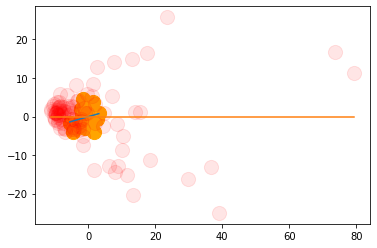

In [23]:
plt.scatter(topNFeatures[:, 0], topNFeatures[:, 1], color='orange', s=200, alpha=1);
plt.plot(np.unique(topNFeatures[:, 0]), np.poly1d(np.polyfit(topNFeatures[:, 0], topNFeatures[:, 1], 1))(np.unique(topNFeatures[:, 0])))

plt.scatter(reduced_dim[:, 0], reduced_dim[:, 1], color='red', s=200, alpha=0.1);
plt.plot(np.unique(reduced_dim[:, 0]), np.poly1d(np.polyfit(reduced_dim[:, 0], reduced_dim[:, 1], 1))(np.unique(reduced_dim[:, 0])))
plt.show()

In [24]:
# from sklearn.metrics import accuracy_score
# accuracy_score(reduced_dim, topNFeatures)

In [25]:
#PLOT the centroids and the randomly generated data
%matplotlib inline
import matplotlib.pyplot as plt

/home/lucas/anaconda3/envs/dic/lib/python3.8/site-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/lucas/anaconda3/envs/dic/lib/python3.8/site-packages/matplotlib/transforms.py:918: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 0] = interval
/home/lucas/anaconda3/envs/dic/lib/python3.8/site-packages/matplotlib/transforms.py:923: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


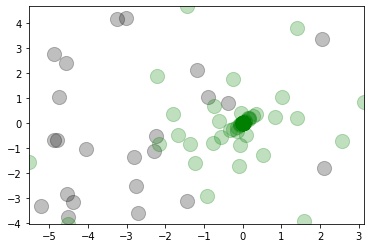

In [26]:
plt.scatter(reduced_dim[:, 0], reduced_dim[:, 1], color='black', s=200, alpha=0.25);
topNFeatures = topNFeatures
# display(topNFeatures)
plt.scatter(topNFeatures[:, 0], topNFeatures[:, 1], color='green', s=200, alpha=0.25);

plt.axis([np.min(topNFeatures[:, 0]), np.max(topNFeatures[:, 0]), np.min(topNFeatures[:, 1]), np.max(topNFeatures[:, 1])]);

# K MEANS

In [3]:
# A = X_train[0:5, 0:5]
# A = np.array([[4, 8, 7], [9, 5, 1], [2, 2, 5], [1, 3, 6], [2, 3, 6], [3, 3, 6], [4, 3, 6], [5, 3, 6]])
A = np.random.randint(0, 20, size=(100, 2))
# display(A)
display(A.shape)
N = 3

(100, 2)

In [4]:
#2) Randomly finds samples without replacement

rand_idx = np.random.choice(A.shape[0], N, replace=False)
# display(rand_idx)

#Displays the random points
centroids = np.array([A[rand_idx[i], :] for i in range(len(rand_idx))]) 
display(centroids)

array([[11,  6],
       [19,  0],
       [14,  9]])

In [25]:
#3) Reassign all points to the closest centroid

cent_labels = np.array([])
# display(cent_labels)

#loops through each of the points
for i in range(A.shape[0]):
    closest_cent = 0
    
    #by default smallest_dist computes the dist b/t current point and first centroid
    smallest_dist = euclidean_dist(A[i, :], centroids[0, :])
    
    #loops through each of the centroids, find the closest centroid the current point
    for j in range(centroids.shape[0]):
        current_dist = euclidean_dist(A[i, :], centroids[j, :])
        if current_dist < smallest_dist:
            smallest_dist = current_dist
            closest_cent = j
            
    #adds the current centroid to the list
    cent_labels = np.append(cent_labels, closest_cent)

In [7]:
#PLOT the centroids and the randomly generated data
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(A.shape[0]):
    if cent_labels[i] == 0:
        plt.scatter(A[i, 0], A[i, 1], color="r", s=50);
    elif cent_labels[i] == 1:
        plt.scatter(A[i, 0], A[i, 1], color="b", s=50);
    elif cent_labels[i] == 2:
        plt.scatter(A[i, 0], A[i, 1], color="g", s=50);
#     elif cent_labels[i] == 3:
#         plt.scatter(A[i, 0], A[i, 1], color="o", s=50);
#     elif cent_labels[i] == 4:
#         plt.scatter(A[i, 0], A[i, 1], color="p", s=50);
        
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=200, alpha=0.25);

NameError: name 'cent_labels' is not defined

In [55]:
#4) Recalculate centroid coordinate based on point assignment
#New centroid value is the average of all point that currently have that centroid's label

# combined = np.append(A, cent_labels, axis=1)
# display(centroids)
# display(combined)
# display(A)

# labels = combined[:, combined.shape[1]-1]
labels = cent_labels
display(labels.shape)

#reshapes cent_labels
# labels = cent_labels.reshape((cent_labels.shape[0],1))
# display(labels)

#loop through the data summing the data by label and then dividing by the total occurances of that label

# hist = np.histogram([0, 1, 2, 1], bins=[0, 1, 2, 3])
# display(hist)

# sorted_combined = combined[np.argsort(combined[:, combined.shape[1]-1])]
# display(sorted_combined)

labels = cent_labels.astype(int)
# display(labels)

#sum up occurances of each label using bincount
label_counts = np.bincount(labels)
display(label_counts.shape)
# display(label_counts)

#reshape labels counts
label_counts = label_counts.reshape((label_counts.shape[0],1))
display(label_counts.shape)

#reshape labels
labels = labels.reshape((labels.shape[0],1))
display(labels.shape)
# display(labels)

#sum up all of points by label
point_sums = np.zeros((3,2), dtype=int)
# display(point_sums)

for i in range(labels.shape[0]):
    if labels[i] == 0:
        point_sums[0, 0] += A[i,0]
        point_sums[0, 1] += A[i,1]
    if labels[i] == 1:
        point_sums[1, 0] += A[i,0]
        point_sums[1, 1] += A[i,1]
    if labels[i] == 2:
        point_sums[2, 0] += A[i,0]
        point_sums[2, 1] += A[i,1]

display(point_sums)

#get a new centroids by dividing point sums by the label occurances
new_centroids = np.divide(point_sums, label_counts)
# display(centroids)
display(new_centroids)

(100,)

(3,)

(3, 1)

(100, 1)

array([[232, 394],
       [122,  12],
       [562, 579]])

array([[ 4.64      ,  7.88      ],
       [17.42857143,  1.71428571],
       [13.06976744, 13.46511628]])

In [48]:
for i in range(A.shape[0]):
    if cent_labels[i] == 0:
        plt.scatter(A[i, 0], A[i, 1], color="r", s=50);
    elif cent_labels[i] == 1:
        plt.scatter(A[i, 0], A[i, 1], color="b", s=50);
    elif cent_labels[i] == 2:
        plt.scatter(A[i, 0], A[i, 1], color="g", s=50);
        
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=200, alpha=0.25);
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='purple', s=200, alpha=0.25);

NameError: name 'cent_labels' is not defined

In [155]:
#HELPER FUNCTION to calculate Euclidean distance between 2 points
def euclidean_dist(pointA, pointB):
    dist = np.sqrt(np.sum((pointA-pointB)**2), axis=0)
    return dist

#Dist TEST
# p1 = centroids[1, :]
# p2 = centroids[2, :]

# p1 = np.array([1, 2, 3])
# p2 = np.array([4, 4, 5])

# display(euclidean_dist(p1, p2))

array([[779, 683],
       [650, 734],
       [584, 890],
       [ 90,  42],
       [301,  41],
       [546, 455],
       [311, 489],
       [274,  72],
       [403, 633],
       [ 32, 791]])

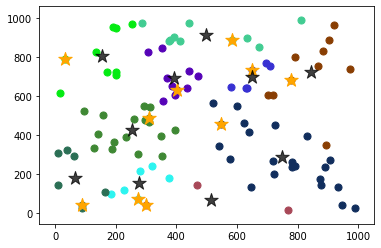

array([[842.7       , 722.4       ],
       [650.        , 698.83333333],
       [498.5       , 914.6       ],
       [ 66.14285714, 178.28571429],
       [513.        ,  66.33333333],
       [747.59090909, 285.63636364],
       [253.        , 428.05882353],
       [276.5       , 153.83333333],
       [391.3       , 691.1       ],
       [156.        , 807.77777778]])

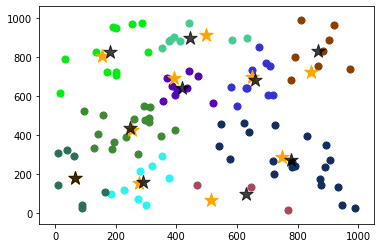

array([[865.5       , 831.5       ],
       [658.9       , 680.8       ],
       [446.125     , 896.5       ],
       [ 66.14285714, 178.28571429],
       [628.        ,  97.        ],
       [778.75      , 269.55      ],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [419.66666667, 644.11111111],
       [181.45454545, 825.        ]])

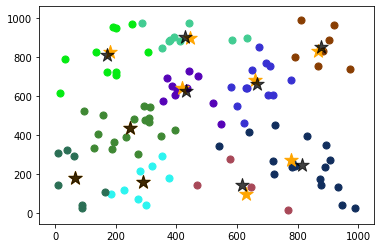

array([[877.85714286, 852.71428571],
       [665.91666667, 662.58333333],
       [428.44444444, 905.33333333],
       [ 66.14285714, 178.28571429],
       [615.25      , 142.        ],
       [813.47058824, 247.        ],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [432.3       , 625.2       ],
       [170.9       , 809.9       ]])

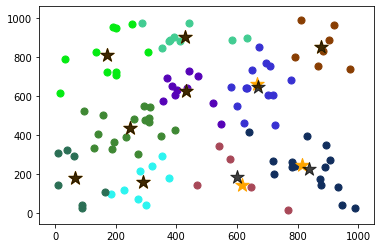

array([[877.85714286, 852.71428571],
       [670.46153846, 646.23076923],
       [428.44444444, 905.33333333],
       [ 66.14285714, 178.28571429],
       [600.2       , 182.8       ],
       [837.6       , 226.86666667],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [432.3       , 625.2       ],
       [170.9       , 809.9       ]])

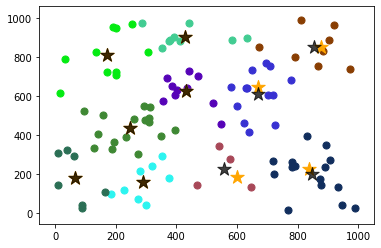

array([[852.        , 852.875     ],
       [668.07692308, 612.61538462],
       [428.44444444, 905.33333333],
       [ 66.14285714, 178.28571429],
       [558.        , 225.25      ],
       [846.2       , 199.93333333],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [432.3       , 625.2       ],
       [170.9       , 809.9       ]])

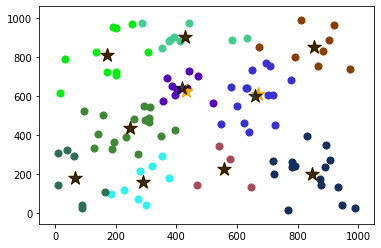

array([[852.        , 852.875     ],
       [659.35714286, 601.35714286],
       [428.44444444, 905.33333333],
       [ 66.14285714, 178.28571429],
       [558.        , 225.25      ],
       [846.2       , 199.93333333],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [419.66666667, 644.11111111],
       [170.9       , 809.9       ]])

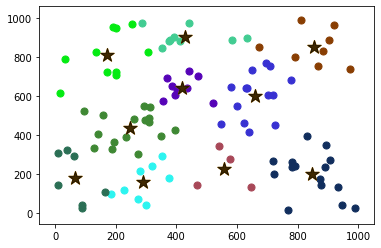

array([[852.        , 852.875     ],
       [659.35714286, 601.35714286],
       [428.44444444, 905.33333333],
       [ 66.14285714, 178.28571429],
       [558.        , 225.25      ],
       [846.2       , 199.93333333],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [419.66666667, 644.11111111],
       [170.9       , 809.9       ]])

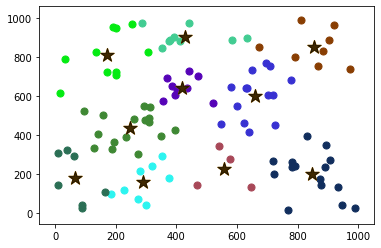

array([[852.        , 852.875     ],
       [659.35714286, 601.35714286],
       [428.44444444, 905.33333333],
       [ 66.14285714, 178.28571429],
       [558.        , 225.25      ],
       [846.2       , 199.93333333],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [419.66666667, 644.11111111],
       [170.9       , 809.9       ]])

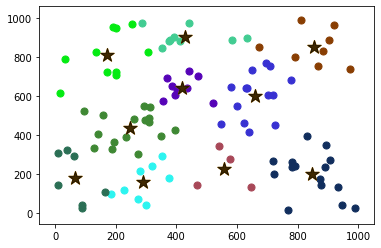

array([[852.        , 852.875     ],
       [659.35714286, 601.35714286],
       [428.44444444, 905.33333333],
       [ 66.14285714, 178.28571429],
       [558.        , 225.25      ],
       [846.2       , 199.93333333],
       [246.75      , 436.5625    ],
       [289.125     , 157.        ],
       [419.66666667, 644.11111111],
       [170.9       , 809.9       ]])

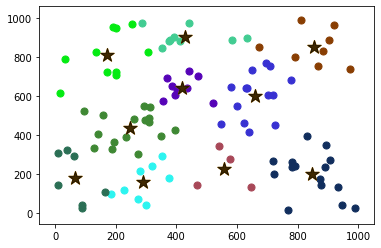

In [6]:
#PUTTING IT ALL TOGETHER

#PLOT the centroids and the randomly generated data
%matplotlib inline
import matplotlib.pyplot as plt

#1) Choose the number of clusters (K = N)
A = np.random.randint(0, 1000, size=(100, 2))
# display(A)
N = 10
    
#2) Initialize N centroids to "random" values of the data,
rand_idx = np.random.choice(A.shape[0], N, replace=False)
centroids = np.array([A[rand_idx[i], :] for i in range(len(rand_idx))])

#Generates N random colors
c=np.random.rand(N,3)

iterations = 10

for it in range(iterations):
    labels = np.array([])
#     display(centroids)
    
    #3) Reassign all points to the closest centroid
    #Calculate Euclidean distance between each point and each centroid, assign each point to the min dist centroid

    #loops through each of the points
    for i in range(A.shape[0]):
        closest_cent = 0
    
        #by default smallest_dist computes the dist b/t current point and first centroid
        smallest_dist = euclidean_dist(A[i, :], centroids[0, :])
    
        #loops through each of the centroids, find the closest centroid the current point
        for j in range(centroids.shape[0]):
            current_dist = euclidean_dist(A[i, :], centroids[j, :])
            if current_dist < smallest_dist:
                smallest_dist = current_dist
                closest_cent = j
            
        #adds the current centroid to the list
        labels = np.append(labels, closest_cent)
    
    #reshapes labels
    # labels = labels.reshape((labels.shape[0],1))
    # display(labels)

    #4) Recalculate centroid coordinate based on point assignment
    #New centroid value is the average of all point that currently have that centroid's label
#     display(labels.shape)

    labels = labels.astype(int)
    # display(labels)

    #sum up occurances of each label using bincount
    label_counts = np.bincount(labels)
    # display(label_counts.shape)
    # display(label_counts)

    #reshape labels counts
    label_counts = label_counts.reshape((label_counts.shape[0],1))
    # display(label_counts.shape)

    #reshape labels
    labels = labels.reshape((labels.shape[0],1))
    # display(labels.shape)
    # display(labels)

    #sum up all of points by label
    point_sums = np.zeros((N,2), dtype=int)
    # display(point_sums)

    for i in range(labels.shape[0]):
        
        for j in range(centroids.shape[0]):
            if labels[i] == j:
                point_sums[j, 0] += A[i,0]
                point_sums[j, 1] += A[i,1]

#         if labels[i] == 0:
#             point_sums[0, 0] += A[i,0]
#             point_sums[0, 1] += A[i,1]
#         if labels[i] == 1:
#             point_sums[1, 0] += A[i,0]
#             point_sums[1, 1] += A[i,1]
#         if labels[i] == 2:
#             point_sums[2, 0] += A[i,0]
#             point_sums[2, 1] += A[i,1]

#     display(point_sums)

    #get a new centroids by dividing point sums by the label occurances
    new_centroids = np.divide(point_sums, label_counts)
    
    display(centroids)
    
    for i in range(A.shape[0]):
        
        for j in range(centroids.shape[0]):
            if labels[i] == j:
                plt.scatter(A[i, 0], A[i, 1], color=c[j], s=50);
        
#         if labels[i] == 0:
#             plt.scatter(A[i, 0], A[i, 1], color=c[0], s=50);
#         elif labels[i] == 1:
#             plt.scatter(A[i, 0], A[i, 1], color=c[1], s=50);
#         elif labels[i] == 2:
#             plt.scatter(A[i, 0], A[i, 1], color=c[2], s=50);
        
    plt.scatter(centroids[:, 0], centroids[:, 1], color='orange', s=200, alpha=1, marker="*");
    plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='black', s=200, alpha=0.75, marker="*");
#     plt.pause(0.05)
    plt.show()
    
    centroids = new_centroids
#     display(new_centroids)

In [38]:
A2 = np.square(X_train[:, :])
B2 = np.square(X_test[:, :])
B2_new = B2[:,np.newaxis]
A2andB2 = A2+B2_new
A2andB2 = np.sum(A2andB2,axis=2)
X_train_normalnew = np.transpose(X_train)
AB2 = np.multiply(2, np.dot(X_test[:, :],X_train_normalnew))
Euclidean = np.sqrt(A2andB2 + AB2)

display(Euclidean)

array([[33.2325593 , 28.62625749, 27.34765489, ..., 61.1340272 ,
        30.72726645, 29.95440035],
       [23.91842148, 19.40845624, 18.9764937 , ..., 56.78577743,
        21.94528894, 21.77346499],
       [32.12479289, 27.13917998, 27.18787261, ..., 63.69849824,
        30.01026994, 29.42727777],
       ...,
       [28.63092807, 23.77761726, 24.25934473, ..., 61.00027865,
        26.70409967, 26.38479112],
       [21.05008482, 16.96306421, 16.21629713, ..., 53.04079195,
        18.98202188, 18.86906909],
       [22.42497636, 17.95740126, 17.75684757, ..., 54.7083248 ,
        20.43096973, 20.18128681]])

In [234]:
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    
    #1) Initialize N centroids to "random" values of the data,

    #Choose random indices based on the bounds of the data
    rand_idx = np.random.choice(X_train.shape[0], N, replace=False)
    centroids = np.array([X_train[rand_idx[i], :] for i in range(len(rand_idx))])
#     display(centroids)
    
    #Generates N random colors
#     c=np.random.rand(N,3)

    it = 0
    max_iterations = 100
    old_centroids = np.zeros((N, X_train.shape[1]))

    while not(np.array_equal(centroids, old_centroids)) and it < max_iterations:
#         print("Iteration =", it)
        labels = np.array([])
        old_centroids = centroids
    
        #2) Reassign all points to the closest centroid

        #loops through each of the points
        for i in range(X_train.shape[0]):
            closest_cent = 0
    
            #by default smallest_dist computes the dist b/t current point and first centroid
#             smallest_dist = euclidean_dist(X_train[i, :], centroids[0, :])
            smallest_dist = 2147483647
#             print("Smallest Dist:", smallest_dist)
    
            #loops through each of the centroids, find the closest centroid the current point
            for j in range(centroids.shape[0]):
                current_dist = np.sqrt(np.sum((X_train[i, :]-centroids[j, :])**2, axis=0))
                if current_dist < smallest_dist:
                    smallest_dist = current_dist
                    closest_cent = j
            
            #adds the current centroid to the list
            labels = np.append(labels, closest_cent)
#             display(labels)
            
        
        
        #3) Recalculate centroid coordinate based on point assignment
        
        #sum up occurances of each label using bincount
        labels = labels.astype(int)
        
#         display(labels)
        
        label_counts = np.bincount(labels)

        #reshape labels counts
        label_counts = label_counts.reshape((label_counts.shape[0],1))

        #reshape labels
        labels = labels.reshape((labels.shape[0],1))
        
#         display(labels)
        
        #sum up all of points by label
        point_sums = np.zeros((N, X_train.shape[1]))
#         point_sums = np.array()

#         display(centroids)

        for i in range(labels.shape[0]):
            for j in range(centroids.shape[0]):
                if labels[i] == j:
                    point_sums[j, 0] += X_train[i,0]
                    point_sums[j, 1] += X_train[i,1]
                    
#         display(point_sums)

        #get a new centroids by dividing point sums by the label occurances
        new_centroids = np.divide(point_sums, label_counts)
        
#         for i in range(X_train.shape[0]):
#             for j in range(centroids.shape[0]):
#                 if labels[i] == j:
#                     plt.scatter(X_train[i, 0], X_train[i, 1], color=c[j], s=50);
        
#         plt.scatter(centroids[:, 0], centroids[:, 1], color='orange', s=200, alpha=1, marker="*");
#         plt.scatter(new_centroids[:, 0], new_centroids[:, 1], color='black', s=200, alpha=0.75, marker="*");
#         plt.show()
    
        centroids = new_centroids
#         display(centroids)
        
        it += 1
        
#     print("Iterations:", it)
#     plt.scatter(centroids[:, 0], centroids[:, 1], color='black', s=200, alpha=1, marker="*");
#     plt.show()
    return centroids

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
N = 3

# X, y_true = make_blobs(n_samples=30000, centers=N, cluster_std=0.60, random_state=0)

# X = np.random.randint(0, 100000000, size=(500, 10))

cent = Kmeans(X_train[:,:], N)
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);
plt.scatter(cent[:, 0], cent[:, 1], s=50);

plt.axis([np.min(X_train[:, 0]), np.max(X_train[:, 0]), np.min(X_train[:, 1]), np.max(X_train[:, 1])]);

In [231]:
pA = np.array([3, 4, 5])
pB = np.array([3, 4, 2])
display(euclidean_dist(pA, pB))

TypeError: 'axis' is an invalid keyword to ufunc 'sqrt'

In [61]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    display(centers)

array([ 98, 259, 184, 256])

array([[ 0.27239604,  5.46996004],
       [-1.36999388,  7.76953035],
       [ 0.08151552,  4.56742235],
       [-0.6149071 ,  3.94963585]])

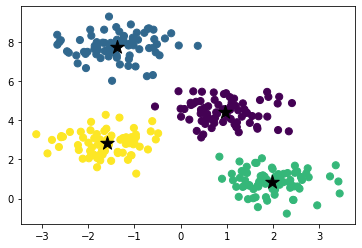

In [82]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, N, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    random_indices = rng.permutation(X.shape[0])[:N]
    display(random_indices)
    centroids = X[random_indices]
    display(centroids)
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centroids)
        
        # 2b. Find new centers from means of points
        new_centroids = np.array([X[labels == i].mean(0) for i in range(N)])
        
        # 2c. Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], color='black', s=200, alpha=1, marker="*");

In [55]:
find_clusters(X, N)

(array([[ 0.94973532,  4.41906906],
        [-1.37324398,  7.75368871],
        [ 1.98258281,  0.86771314],
        [-1.58438467,  2.83081263]]),
 array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
        0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
        3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
        1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
        1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
        3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
        3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
        2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
        2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
        3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
        1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
        2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2,

In [ ]:
def SklearnSupervisedLearning(X_train,Y_train,X_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
"

In [ ]:
def SklearnVotingClassifier(X_train,Y_train,X_test):
    
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """


"""
Create your own custom functions for Matplotlib visualization of hyperparameter search. 
Make sure that plots are labeled and proper legends are used
""